# Knowledge graph embedding learning example notebook

### Importing torch and related modules
#### architechures
The 'architechures' module contanins different implementations of various state-of-the-art architechures currently used in practice for learning knowledge graph embedding. Currently it supports HOLE, ComplEx and QuatE architechures, on which more details can be found in the 'papers' directory. 
The architechures are implemented in PyTorch such that it can further be used along with different dense net architechures and can directly be called in the main neural networks pipeline in PyTorch.

#### models
The 'models' module contains the training and testing implementations for sequential neural networks. Furthermore distributed training can be implemented in the same module and can be used without much changes in the main pipeline.

#### preprocessing
The 'preprocessing' module contains 'DataGenerator' class which takes care of all the data cleaning, synthesis and processing them into batches and some other utility functions for one-hot-encodings etc. The only argument required by the module is .nt format file path containing triplet dataset (triplet in each row). The indices for false triplets are generated using uniform distribution and for more details refer to the source code.

In [31]:
from KG.architechures import HOLE, ComplEx, QuatE
from KG.models import Network
import torch
from torch import nn
import numpy as np
from KG.preprocessing import DataGenerator
from sklearn.model_selection import train_test_split


### Data preprocessing
The load_dataset method takes input the .nt format file complete file path. The method internally identifies the triplets (which are true) from the dataset and map them to integers to prepare the true fact dataset. The false facts are synthesise using randomly generated indices for adjacency matrix of the triplet. The final dataset contains equal number of true and false facts between the entities and relation.

In [32]:
# loading the dataset from the .nt file containing complete dataset
obj = DataGenerator()
X, y, num_entities, num_relations = obj.load_dataset("/home/bhavya/Desktop/projects/KG-Embedding-Learning---PyTorch/dataset/siemens data/01.nt")
print(X, y)

# split dataset randomly in training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

[[129  95   8]
 [ 69   9  16]
 [227  14  13]
 ...
 [157 131  16]
 [136  95  14]
 [144   9  17]] [[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


### Declaring values for hyperparameters (including dimensions of embeddings)

In [33]:
# declaring hyperparameters
num_dim = 10  # dimension of embedding vector
alpha = 0  # coefficient of regularization term
batch_size = 20  # backprop for this many combined datapoints
num_epochs = 10  # number of loops over training dataset

### Building the model 
Example uses 'QuatE' object but other architechures can also be used to experiment with and benchmark the performance. 

In [44]:
model = Network(QuatE(num_dim, num_entities, num_relations))  # choosing QuatE (latest) architechure
model.compile(optimizer_name="adam", loss="LogisticLoss", regularizer="L2", alpha=alpha)  # compiling the model

### Training on the dataset
The plot shown below is training loss (red) and validation loss (blue) vs number of epochs. The plot can be used to observe for the early stopping criteria with different regularization coefficients (alpha, default=0)

epoch no.  1
accuracy on validation set:  0.4981481481481482
epoch no.  2
accuracy on validation set:  0.5314814814814814
epoch no.  3
accuracy on validation set:  0.5938271604938272
epoch no.  4
accuracy on validation set:  0.5938271604938272
epoch no.  5
accuracy on validation set:  0.5993827160493826
epoch no.  6
accuracy on validation set:  0.6049382716049383
epoch no.  7
accuracy on validation set:  0.6104938271604938
epoch no.  8
accuracy on validation set:  0.6104938271604938
epoch no.  9
accuracy on validation set:  0.6160493827160495
epoch no.  10
accuracy on validation set:  0.6160493827160495


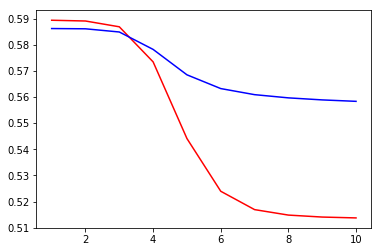

In [45]:
model.fit(x_train, y_train, batch_size, num_epochs, validation_split=0.2)

### Performance Evaluation on testing dataset
The performance is evaluated on unseen testing dataset.

In [46]:
from sklearn.metrics import accuracy_score

y_pred = torch.gt(model.predict(x_test), 0.5).long().numpy()
accuracy = accuracy_score(y_test, y_pred)
print("accuracy on testing set: ", accuracy * 100)


accuracy on testing set:  63.942307692307686
